# Step 1 : Data Cleaning

We begin by importing the python packages and modules we will be using. Next we'll import our csv file as a dataframe and have a look how our dataframe looks like. 

In [774]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("all_infos_processed.csv")
#We look at our dataframe 
#Here comes basic functions 

df.head()



,Unnamed: 0.1,Locality,Type_of_property,Subtype_of_property,Price,Type_of_sale,Number_of_rooms,Living_Area,Fully_equipped_kitchen,Furnished,Open_fire,Terrace,Terrace_Area,Garden,Garden_Area,Surface_area_of_the_plot_of_land,Number_of_facades,Swimming_pool,State_of_the_building,Unnamed: 0
0,0,1130,APARTMENT,PENTHOUSE,450000.0,residential_sale,3.0,156.0,USA_HYPER_EQUIPPED,False,False,True,43.0,NaN,NaN,NaN,4.0,NaN,NaN,0.0
1,1,1140,APARTMENT,PENTHOUSE,450000.0,residential_sale,3.0,156.0,USA_HYPER_EQUIPPED,False,False,True,43.0,NaN,NaN,NaN,4.0,NaN,NaN,1.0
2,2,1140,APARTMENT,PENTHOUSE,450000.0,residential_sale,3.0,156.0,USA_HYPER_EQUIPPED,False,False,True,43.0,NaN,NaN,NaN,4.0,NaN,NaN,2.0
3,3,1180,APARTMENT,APARTMENT,485000.0,residential_sale,2.0,107.0,USA_HYPER_EQUIPPED,False,False,True,17.0,NaN,NaN,NaN,NaN,False,AS_NEW,3.0
4,4,1000,APARTMENT,DUPLEX,460000.0,residential_sale,3.0,147.0,USA_HYPER_EQUIPPED,False,False,True,52.0,NaN,NaN,NaN,2.0,NaN,NaN,4.0


In [775]:
df.tail()

,Unnamed: 0.1,Locality,Type_of_property,Subtype_of_property,Price,Type_of_sale,Number_of_rooms,Living_Area,Fully_equipped_kitchen,Furnished,Open_fire,Terrace,Terrace_Area,Garden,Garden_Area,Surface_area_of_the_plot_of_land,Number_of_facades,Swimming_pool,State_of_the_building,Unnamed: 0
19367,18,1150,HOUSE,VILLA,1450000.0,residential_sale,5.0,460.0,NaN,False,False,True,55.0,True,300.0,792.0,4.0,False,GOOD,18.0
19368,19,7000,HOUSE,VILLA,1495000.0,residential_sale,7.0,500.0,HYPER_EQUIPPED,False,True,True,200.0,True,10200.0,10550.0,4.0,True,AS_NEW,19.0
19369,20,8480,HOUSE,VILLA,1595000.0,residential_sale,4.0,537.0,INSTALLED,False,False,True,NaN,True,NaN,14376.0,4.0,False,GOOD,20.0
19370,21,1640,HOUSE,VILLA,1735000.0,residential_sale,6.0,450.0,INSTALLED,False,True,True,30.0,NaN,NaN,2285.0,4.0,NaN,GOOD,21.0
19371,22,1000,HOUSE,HOUSE,2050000.0,residential_sale,0.0,566.0,NaN,False,False,NaN,NaN,NaN,NaN,0.0,3.0,False,AS_NEW,22.0


This gives us the insight that we need to clean the data. We have two columns which we don't need (first and last column). They were imported from our previous dataset resulting from the data collection part (1). Next, we want to remove the duplicates (2). In a next step we don't want to have rows with only missing values (3). In a last step, we prefer to have a dataset which consists only of numerical values. We will use dictionnaries to map string values to numbers. We leave 'Nan' and 'None' as it is. We also leave 'True' and 'False' as it is. This is threated as 1 or 0. The locality column gives information about the postal code of each city hence we can rename it to Postal_code(5).  

In [776]:
# Cleaning the dataset

#(1) Drop indices as Pandas creates indices too
df.drop('Unnamed: 0.1', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)

#(2) Remove duplicates 
df.drop_duplicates(inplace=True)

#(3) No blank spaces. This method will delete the rows with ALL Nan values
df.dropna(how='all') 

#(4) Converting categorical data to numerical values.   
df = df.replace({"Type_of_property":{"APARTMENT": 1, "APARTMENT_GROUP": 2, "HOUSE": 3, "HOUSE_GROUP": 4}})
df = df.replace({"Subtype_of_property":{"PENTHOUSE": 1,"APARTMENT": 2, "DUPLEX": 3, "GROUND_FLOOR": 4, "FLAT_STUDIO": 5,"LOFT": 6, "TRIPLEX": 7, "SERVICE_FLAT": 8, "APARTMENT_GROUP": 9, "KOT": 10, "HOUSE": 11, "HOUSE_GROUP": 12, "APARTMENT_BLOCK": 13, "VILLA": 14, "MANSION": 15, "MIXED_USE_BUILDING": 16, "EXCEPTIONAL_PROPERTY": 17, "COUNTRY_COTTAGE": 18, "BUNGALOW": 19, "TOWN_HOUSE": 20, "FARMHOUSE": 21, "CHALET": 22, "CASTLE": 23, "OTHER_PROPERTY": 24, "MANOR_HOUSE": 25}})    
df = df.replace({"Type_of_sale":{"residential_sale": 1, "group_sale": 2, "first_session_with_reserve_price": 3, "annuity_monthly_amount": 4, "annuity_without_lump_sum": 5}})
df = df.replace({"Fully_equipped_kitchen":{"NOT_INSTALLED": 1, "INSTALLED": 2, "SEMI_EQUIPPED": 3, "HYPER_EQUIPPED": 4, "USA_UNINSTALLED": 5, "USA_INSTALLED": 6, "USA_SEMI_EQUIPPED": 7, "USA_HYPER_EQUIPPED": 8}})
df = df.replace({"State_of_the_building":{"AS_NEW": 1, "JUST_RENOVATED": 2, "GOOD": 3, "TO_RESTORE": 4,"TO_RENOVATE": 4, "TO_BE_DONE_UP": 4}})

#(5) Change the name of locality to Postal_code:
df.rename(columns={'Locality' :'Postal_code'},inplace=True)



Checking the different datatypes in our dataset also helps us understanding the dataset. We can do that as follows:

In [777]:
# Check type
df.dtypes

# Check shape
df.shape


(17274, 18)

This leaves us with a dataset of 17274 rows and 18 columns. If needed, several 'float' types can be converted to integers. We can do this for the Price column. Here we're not interested in empty values and we would like to convert the type to int. 


In [778]:
df.dropna(subset=['Price'], inplace=True)


In [779]:
df['Price'] = df.Price.astype(int)

In [781]:
df.head()

,Postal_code,Type_of_property,Subtype_of_property,Price,Type_of_sale,Number_of_rooms,Living_Area,Fully_equipped_kitchen,Furnished,Open_fire,Terrace,Terrace_Area,Garden,Garden_Area,Surface_area_of_the_plot_of_land,Number_of_facades,Swimming_pool,State_of_the_building
0,1130,1,1,450000,1,3.0,156.0,8.0,False,False,True,43.0,NaN,NaN,NaN,4.0,NaN,NaN
1,1140,1,1,450000,1,3.0,156.0,8.0,False,False,True,43.0,NaN,NaN,NaN,4.0,NaN,NaN
3,1180,1,2,485000,1,2.0,107.0,8.0,False,False,True,17.0,NaN,NaN,NaN,NaN,False,1.0
4,1000,1,3,460000,1,3.0,147.0,8.0,False,False,True,52.0,NaN,NaN,NaN,2.0,NaN,NaN
5,1340,1,2,475000,1,3.0,115.0,1.0,False,False,True,20.0,NaN,NaN,NaN,NaN,NaN,1.0


It's also worth checking if there are special things to notice in the unique values of each column. 

In [782]:
df['Type_of_property'].value_counts() 

3    9217
1    7430
Name: Type_of_property, dtype: int64

We can drop property types 2 and 4 as they are basically apartment blocks and hence do not include sale price for 1 particular house or apartment price. 


In [783]:
# Filtering by Type of property. 
# Notice that df.Type_of_property is the same as df['Type_of_property']. 
# Pandas has a nice feature which considers the column names as its own attribute 
df=df[df.Type_of_property.isin([1,3])]

Let's check the unique values from other columns 

In [784]:
df.Type_of_property.value_counts()

3    9217
1    7430
Name: Type_of_property, dtype: int64

In [785]:
df.Type_of_sale.value_counts()

1    16449
3      148
4       49
5        1
Name: Type_of_sale, dtype: int64

Here we see that mainly saletype 1 (Type_of_sale) is present in our dataset. Upon further analysing we see that the other values for Type_of_sale are especially meant for life annuity sales or auctions. Those sale prices are not final sale prices and can be deleted. You can also see this upon doing simple statistics on the price of properties. 

In [786]:
#CHECK
df.loc[df.Price.idxmin(),'Type_of_sale']

5

The lowest prices are coming from the salestypes other than 1. We decide to work further with a dataset with only salestype 1 (residential sales). 

In [787]:
df=df[df.Type_of_sale==1]

In [788]:
#This column can then be deleted 
df.drop('Type_of_sale', axis=1, inplace=True)

# Step 2: Data Analysis

In [789]:
df.shape

(16449, 17)

We decide to conduct our data analysis with 16449 rows and 17 columns. Let's answer a few questions that we're interested as part of the data analysis:

 - What is the correlation between the variables and the price and how are the variables correlated to each other? 
 - Which variables have the greatest/least influence on the price? 

 The correlation between variables and the price can be measured using the Pearson correlation coefficient, which ranges between -1 and 1. A value of 1 indicates a perfect positive correlation, a value of -1 indicates a perfect negative correlation, and a value of 0 indicates no correlation. We can get this information bu ising the corr() function in order to get a correlation matrix. 



In [790]:
corr_matrix = df.corr()

#We want to know the correlation between Price and other variables: 
df.corr().Price

C:\Users\nacit\AppData\Local\Temp\ipykernel_3904\4201040309.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()
C:\Users\nacit\AppData\Local\Temp\ipykernel_3904\4201040309.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().Price


Postal_code                        -0.114205
Type_of_property                    0.081799
Subtype_of_property                 0.134400
Price                               1.000000
Number_of_rooms                     0.366331
Living_Area                         0.436421
Fully_equipped_kitchen              0.207457
Open_fire                           0.122738
Terrace_Area                        0.197334
Garden_Area                         0.263415
Surface_area_of_the_plot_of_land    0.352022
Number_of_facades                   0.163954
State_of_the_building              -0.189991
Name: Price, dtype: float64

In [791]:
#We can further adjust the code to show correlations of 0.15 or more
df.corr()[abs(df.corr().Price)>0.15].Price

C:\Users\nacit\AppData\Local\Temp\ipykernel_3904\2491476606.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()[abs(df.corr().Price)>0.15].Price


Price                               1.000000
Number_of_rooms                     0.366331
Living_Area                         0.436421
Fully_equipped_kitchen              0.207457
Terrace_Area                        0.197334
Garden_Area                         0.263415
Surface_area_of_the_plot_of_land    0.352022
Number_of_facades                   0.163954
State_of_the_building              -0.189991
Name: Price, dtype: float64

We will also use the correlation matrix to see how the variables are related to each other: 

C:\Users\nacit\AppData\Local\Temp\ipykernel_3904\3741788573.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


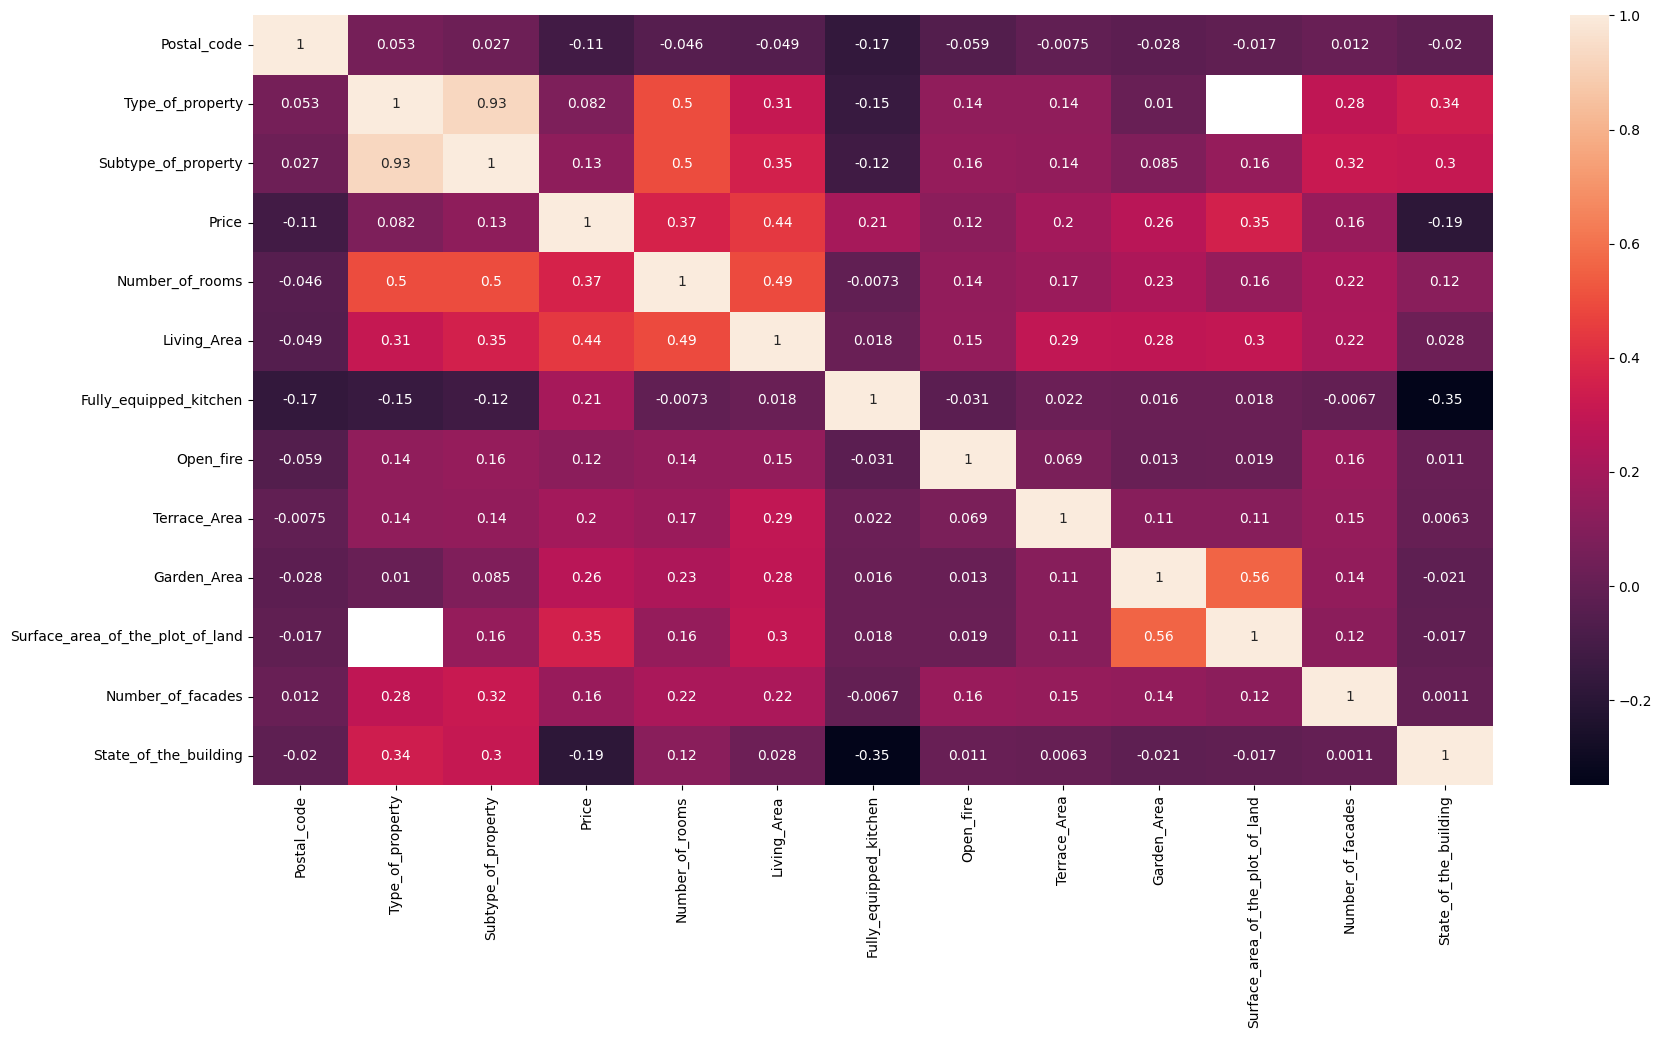

In [792]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

We can visualize the importance of the variables that have a high influence on the sale price. 

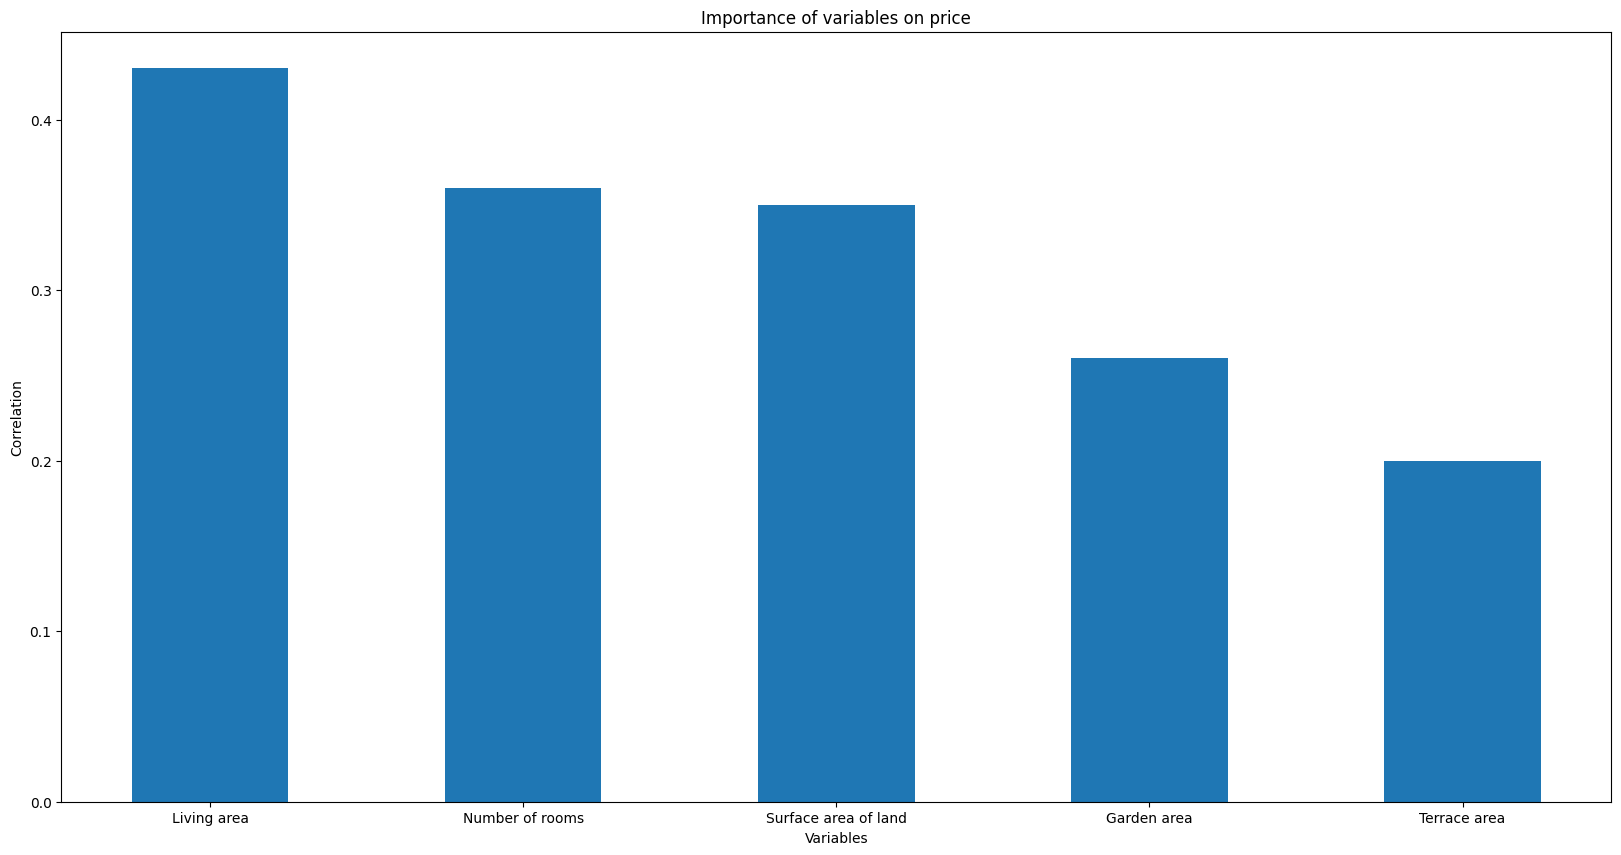

In [793]:
# data for the chart
variables = ['Living area', 'Number of rooms', 'Surface area of land', 'Garden area', 'Terrace area']
correlations = [0.43, 0.36, 0.35, 0.26, 0.20]

# create the chart
fig, ax = plt.subplots()
ax.bar(variables, correlations, width=0.5, bottom=0, align='center', tick_label=variables)
plt.title("Importance of variables on price")
plt.xlabel("Variables")
plt.ylabel("Correlation")
plt.show()

We see that the most important variables that have an influence on the price of a property are Living area, number of rooms, surface area of the land, garden area and terrace area.  When we compare the influence of variables on each other we can also mark important findings. We see that the price of house is negatively correlated with state of building. This looks like the 'higher' the state of building is, the lower the price will be but the categorization of state of building was modelled with 1 as new and 4 as to be renovated so in this case the negative correlation should be interpreted as a positive one. Meaning the newer the state of the property, the higher the price. We can also conclude some insights about the correlation between several variables. The higher the garden area, the higher the surface area of the land will be so this results in a higher correlation (0.56). We also know that the more rooms in a house, the more the living area will be. This translates in a higher correlation between 'number of rooms' and 'living area'.

In [794]:
df.shape

(16449, 17)

- How many qualitative and quantitative variables are there?

After cleaning the data we're left with 16449 rows and 17 columns. The 7 quantitative variables in the dataframe are: Price, Number of rooms, Living Area (in square meter), Terrace Area (in square meter), Garden_Area (in square meter), Surface area of land(in square meter) and Number of facades. The 10 qualitative variables in the dataframe are: Postal code, Type of property, Subtype of property, Type of sale, Fully equipped kitchen, Furnished, Open fire, Terrace, Garden, Swimming pool and State of the building.

- What is the percentage of missing values per column?



In [795]:
percent_missing = (df.isnull().sum() / len(df))* 100
print(percent_missing.round(2))

Postal_code                          0.00
Type_of_property                     0.00
Subtype_of_property                  0.00
Price                                0.00
Number_of_rooms                      0.00
Living_Area                          4.91
Fully_equipped_kitchen              24.90
Furnished                           20.45
Open_fire                            0.00
Terrace                             31.41
Terrace_Area                        55.35
Garden                              61.63
Garden_Area                         74.90
Surface_area_of_the_plot_of_land    44.57
Number_of_facades                   24.37
Swimming_pool                       43.16
State_of_the_building               18.93
dtype: float64


The highest percentages are in terrace area and garden area as they depend on the existence of a terrace and garden. 


## Step 3 : Data Interpretation

In order to answer some questions about the dataset, we need to be able to plot the outliers. We will do this for the Price column and use a sample size of 500. 

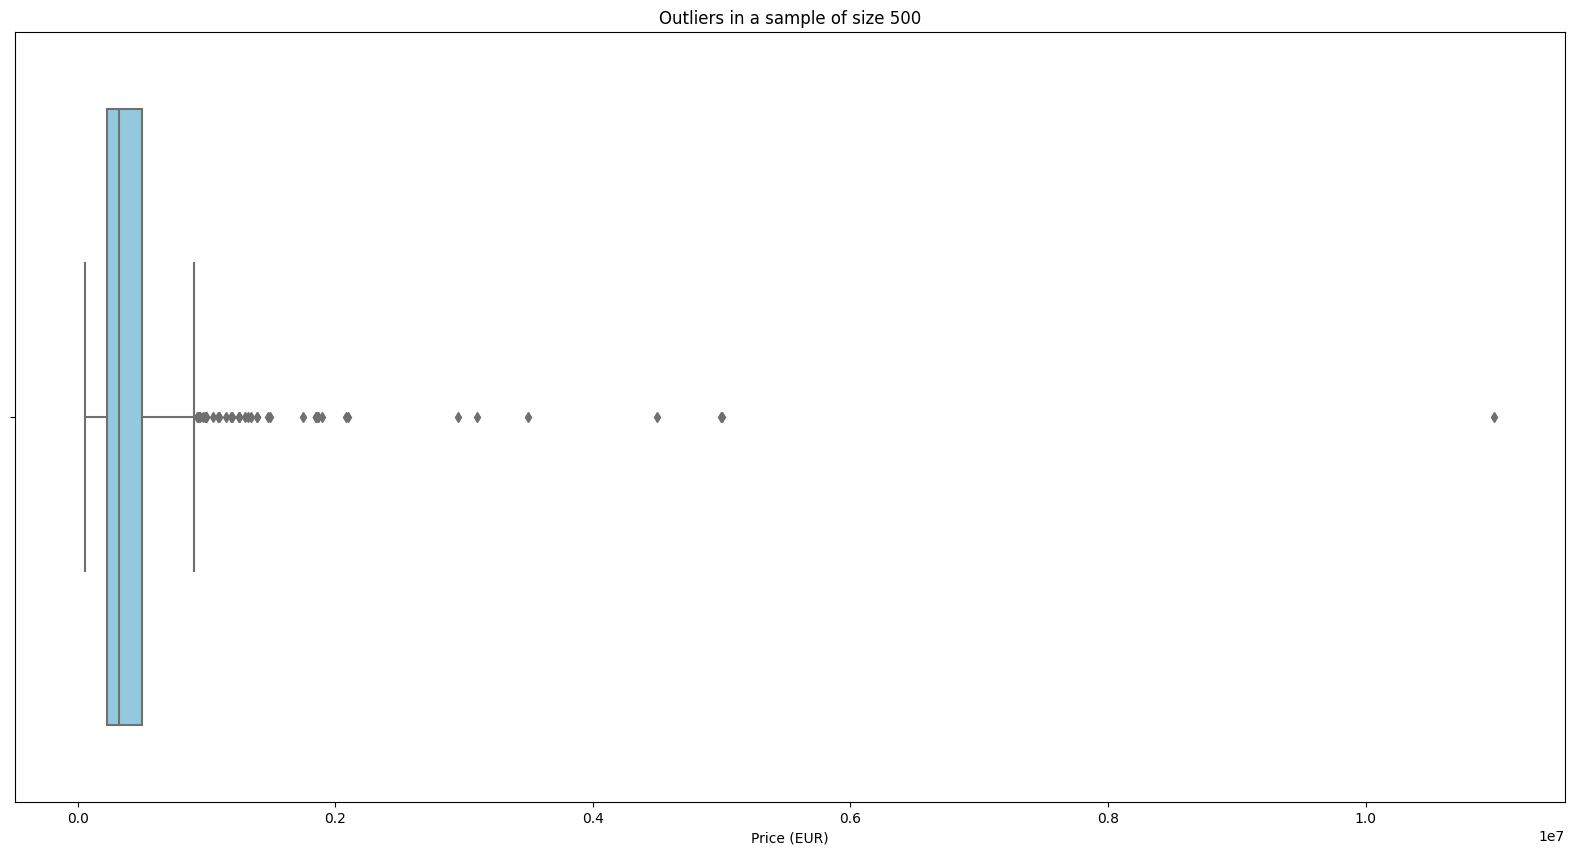

In [796]:
# Sample 500 rows from the dataframe
len_sample=500
df_sample = df.sample(len_sample)

# Create a box plot of the 'Price' column
sns.boxplot(x=df_sample['Price'], color='skyblue')

# Add title and x-axis label
plt.title(f"Outliers in a sample of size {len_sample}")
plt.xlabel('Price (EUR)')

# Show plot
plt.show()

After removing the outliers and the errors found in the dataset. We can work with the new dataset in a price range from 100 000 EUR tot 1 000 000 EUR.  

In [797]:
df=df[(df.Price>100000) & (df.Price <1000000)]

We would like also like to get an idea about how well the price distribution on this dataset is by using a distplot. 

C:\Users\nacit\AppData\Local\Temp\ipykernel_3904\2574419074.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'], color = 'r')


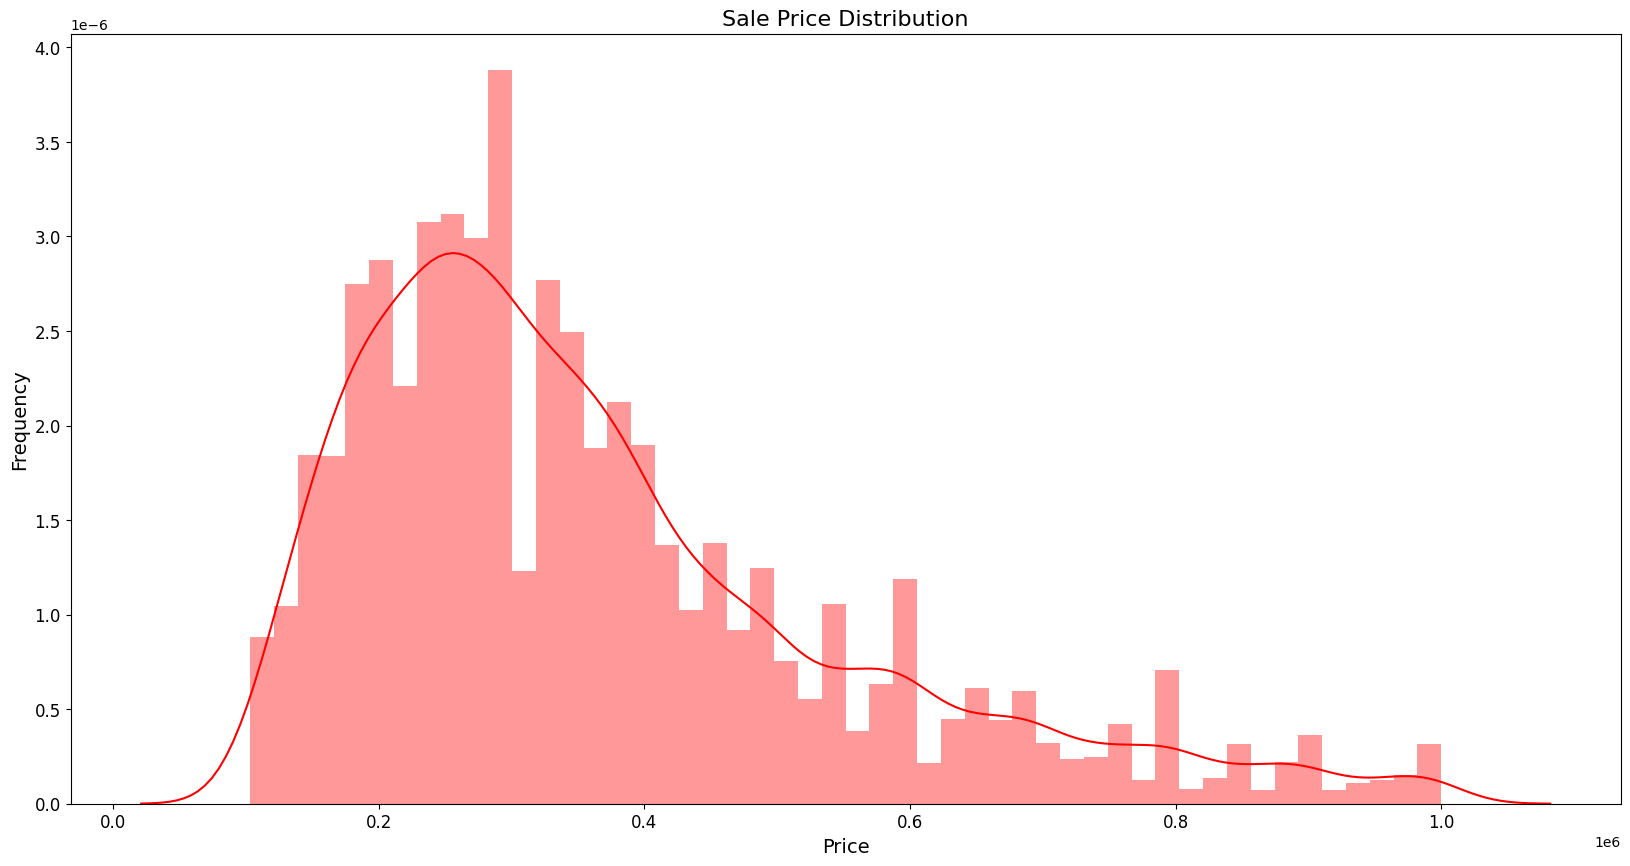

In [798]:
sns.distplot(df['Price'], color = 'r')
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')
plt.show()

Let's also have a look on properties by surface area (living area). We plot a histogram with widt=50. This means that we will count the number of properties with a surface area from 0 to 50 m², 50 to 100 m² and so on. 

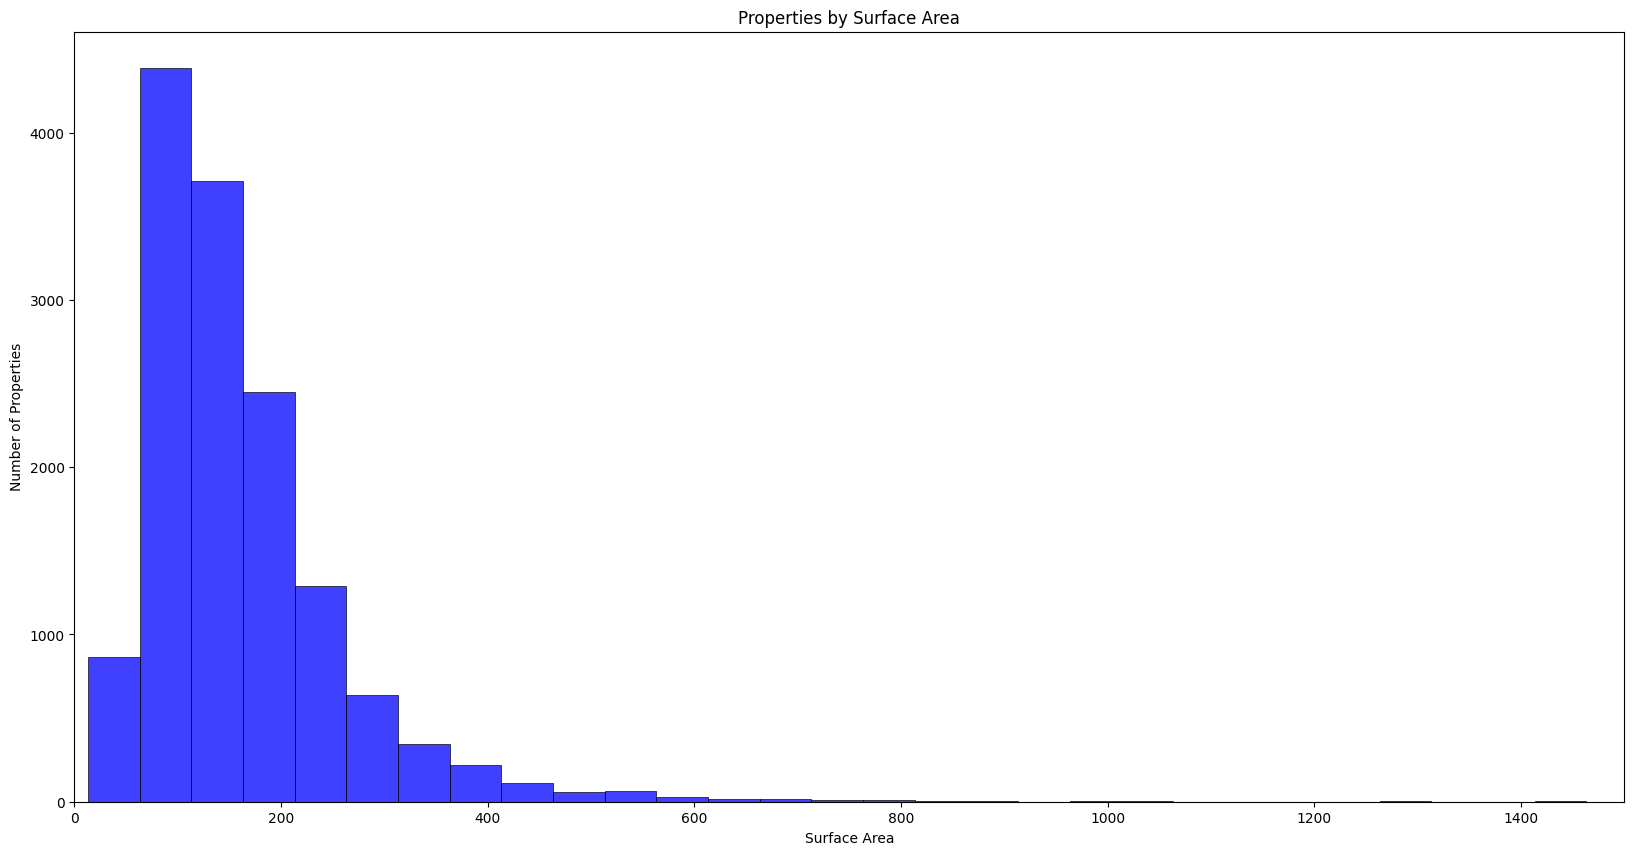

In [799]:
sns.histplot(data=df, x='Living_Area',binwidth=50, color='blue')

# Add title and labels
plt.title('Properties by Surface Area')
plt.xlabel('Surface Area')
plt.ylabel('Number of Properties')

# Show plot
plt.xlim(0, 1500)

plt.show()

As part of the data interpretation we're also interested in the most expensive/less expensive municipalities in Belgium. For this analysis we're going to desribe the Average price, median price and price per square meter for Belgium overall and we'll repeat the process for Flanders and Wallonia too to see if there are any differences. 
 
 


In order to have findings about the regions, we need to link the postal codes with the region. In a later analysis we will also divide the dataset by province. The codes below will link the postal codes with the region and province associated with the postal code. We will categorize Brussels as a province too. 

In [800]:
def region(postal_code):
    if 1000 <= postal_code < 1300:
        return "Brussels"
    elif (postal_code >= 1300 and postal_code < 1500) or (postal_code >= 4000 and postal_code < 8000):
        return "Wallonia"
    else:
        return "Flanders"

In [801]:
def provinces(postal_code):
    if 1000 <= postal_code < 1300:
        return "Brussels"
    elif 1300 <= postal_code < 1500:
        return "Walloon Brabant"
    elif (postal_code >= 1500 and postal_code < 2000) or (postal_code >= 3000 and postal_code < 3500):
        return "Flemish Brabant"
    elif 2000 <= postal_code < 3000:
        return "Antwerp"
    elif 3500 <= postal_code < 4000:
        return "Limburg"
    elif 4000 <= postal_code < 5000:
        return "Liège"
    elif 5000 <= postal_code < 6000:
        return "Namur"
    elif (postal_code >= 6000 and postal_code < 6600) or (postal_code >= 7000 and postal_code < 8000):
        return "Hainaut" 
    elif 6600 <= postal_code < 7000:
        return "Luxembourg"
    elif 8000 <= postal_code < 9000:
        return "West Flanders"  
    else: 
        return "East Flanders	"

In a next step we add those columns to the dataset:

In [802]:
#add column next to Price with region Flanders, Wallonia, Brussels
df.insert(1, 'Region', df.Postal_code.apply(region))

#add column next to Region with the provinces
df.insert(2, 'Province', df.Postal_code.apply(provinces))


To give information about the most/less expensive properties, we need to add an extra column which is the price per square meter. 

In [803]:
#ADelete missing values in living area and create new datasets for each region where we add the price per sqm.
df_bel=df.dropna(subset=['Living_Area'])

#Add new column Price_per_sqm to the dataset
df_bel['Price_per_sqm']=df.Price/df.Living_Area 

df_wal=df_bel[df_bel.Region=="Wallonia"]

df_flan=df_bel[df_bel.Region=="Flanders"]



C:\Users\nacit\AppData\Local\Temp\ipykernel_3904\1624782107.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bel['Price_per_sqm']=df.Price/df.Living_Area


In [804]:
#Sort the values from the belgian dataset according to the price per sqm.
df_bel.sort_values('Price_per_sqm')

,Postal_code,Region,Province,Type_of_property,Subtype_of_property,Price,Number_of_rooms,Living_Area,Fully_equipped_kitchen,Furnished,Open_fire,Terrace,Terrace_Area,Garden,Garden_Area,Surface_area_of_the_plot_of_land,Number_of_facades,Swimming_pool,State_of_the_building,Price_per_sqm
18057,4000,Wallonia,Liège,1,2,363000,2.0,10893.0,2.0,False,False,True,844.0,NaN,NaN,NaN,NaN,False,1.0,33.324153
12140,6747,Wallonia,Luxembourg,3,11,470000,4.0,2721.0,2.0,False,False,NaN,NaN,NaN,NaN,2721.0,4.0,False,NaN,172.730614
11554,7170,Wallonia,Hainaut,3,11,649000,4.0,3410.0,NaN,False,False,NaN,NaN,NaN,NaN,0.0,4.0,False,1.0,190.322581
16194,8570,Flanders,West Flanders,1,2,220500,2.0,1030.0,2.0,NaN,False,True,7.0,NaN,NaN,NaN,4.0,False,1.0,214.077670
16195,8570,Flanders,West Flanders,1,2,228500,2.0,1030.0,2.0,NaN,False,True,10.0,NaN,NaN,NaN,4.0,False,1.0,221.844660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17247,8300,Flanders,West Flanders,1,1,895000,2.0,60.0,4.0,False,False,True,NaN,NaN,NaN,NaN,2.0,NaN,1.0,14916.666667
3064,8300,Flanders,West Flanders,1,1,895000,2.0,60.0,8.0,NaN,False,True,55.0,NaN,NaN,NaN,2.0,False,2.0,14916.666667
1793,8300,Flanders,West Flanders,1,2,940000,2.0,62.0,8.0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,False,1.0,15161.290323
3909,8300,Flanders,West Flanders,1,2,940000,2.0,62.0,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,False,2.0,15161.290323


We can get an idea about the Price_per_sqm by grouping the values according to the postal_code.

In [805]:

df_bel.groupby('Postal_code').Price_per_sqm.mean().sort_values()

Postal_code
5550     514.814815
7804     516.917293
6666     594.059406
6741     594.315245
5576     641.023077
           ...     
8620    4579.418222
3000    5186.512633
1933    5344.951549
8301    5515.626402
8300    8834.459692
Name: Price_per_sqm, Length: 884, dtype: float64

We see that the highest price per square meter is located in the cities with postal codes 8620 (Nieuwpoort), 3000 (Leuven), 1933 (Zaventem), 8301(Knokke-Heist) and 8300(Knokke). Those are municipalities that are coveted by investors as they want to buy and rent for profit. The difference between Knokke and other cities are remarkable and hence need further investigation to see if there are any errors in the dataset.

The less expensive municipalities are the cities with the following postal codes 5550(Alle), 7804(Aat), 6666(Houffalize), 6741(Étalle) and 5576(Beauraing).

In [806]:
# we add the most and less expensive cities to a variable

most_expensive_belgium=df_bel.groupby('Postal_code').Price_per_sqm.mean().sort_values().idxmax()
print(most_expensive_belgium)

lowest_belgium=df_bel.groupby('Postal_code').Price_per_sqm.mean().sort_values().idxmin()
print(lowest_belgium)


8300
5550


We can use those postal codes to find the averages for each city. 

In [807]:
avg= df_bel[df_bel.Postal_code == most_expensive_belgium].Price.mean()
med = df_bel[df_bel.Postal_code==most_expensive_belgium].Price.median()
p_sqm = df_bel[df_bel.Postal_code==most_expensive_belgium].Price_per_sqm.mean()

print(f'The most expensive city in Belgium is in postal code {most_expensive_belgium} located in {region(most_expensive_belgium)}.')
print(f'Average price : {avg} , median :{med}   price per square meter : {round(p_sqm,2)}')

The most expensive city in Belgium is in postal code 8300 located in Flanders.
Average price : 679199.203187251 , median :675000.0   price per square meter : 8834.46


In [808]:
avg= df_bel[df_bel.Postal_code == lowest_belgium].Price.mean()
med = df_bel[df_bel.Postal_code==lowest_belgium].Price.median()
p_sqm = df_bel[df_bel.Postal_code==lowest_belgium].Price_per_sqm.mean()

print(f'The most reasonable prices in Belgium are in postal code {lowest_belgium} located in {region(lowest_belgium)}.')
print(f'Average price : {avg} , median :{med}   price per square meter : {round(p_sqm,2)}')

The most reasonable prices in Belgium are in postal code 5550 located in Wallonia.
Average price : 139000.0 , median :139000.0   price per square meter : 514.81


# Cases 
As part of the project, we were asked to deliver meaningful insights about the dataset. We have therefore worked on 2 questions for the following clients: 
- Client 1 is a (apartment) builder from Wallonia who's building apartment blocks and selling each unit. The builder is doubting wether to install an USA-kitchen and if this will have an effect on the house prices. 
- Client 2 is an investor from Flanders who's interested in buying properties which are in need of restoration. He's wondering in which provinces he can have a better profit margin after renovating it. 

### Case 1: Analyzing the price difference between USA kitchens and normal kitchens in apartments in Wallonia. 

In [809]:
#select apartments from dataset
df_ap=df[df.Type_of_property==1]

#select Wallonia
df_ap_Wallonia=df_ap[df_ap.Region=="Wallonia"]



In [810]:
df_ap_Wallonia_normal=df_ap_Wallonia[df_ap_Wallonia.Fully_equipped_kitchen.isin([1,2,3,4])]

df_ap_Wallonia_USA=df_ap_Wallonia[df_ap_Wallonia.Fully_equipped_kitchen.isin([5,6,7,8])]

df_app=df_ap_Wallonia_normal.drop('Fully_equipped_kitchen', axis=1)
df_usa=df_ap_Wallonia_USA.drop('Fully_equipped_kitchen', axis=1)
#copilot


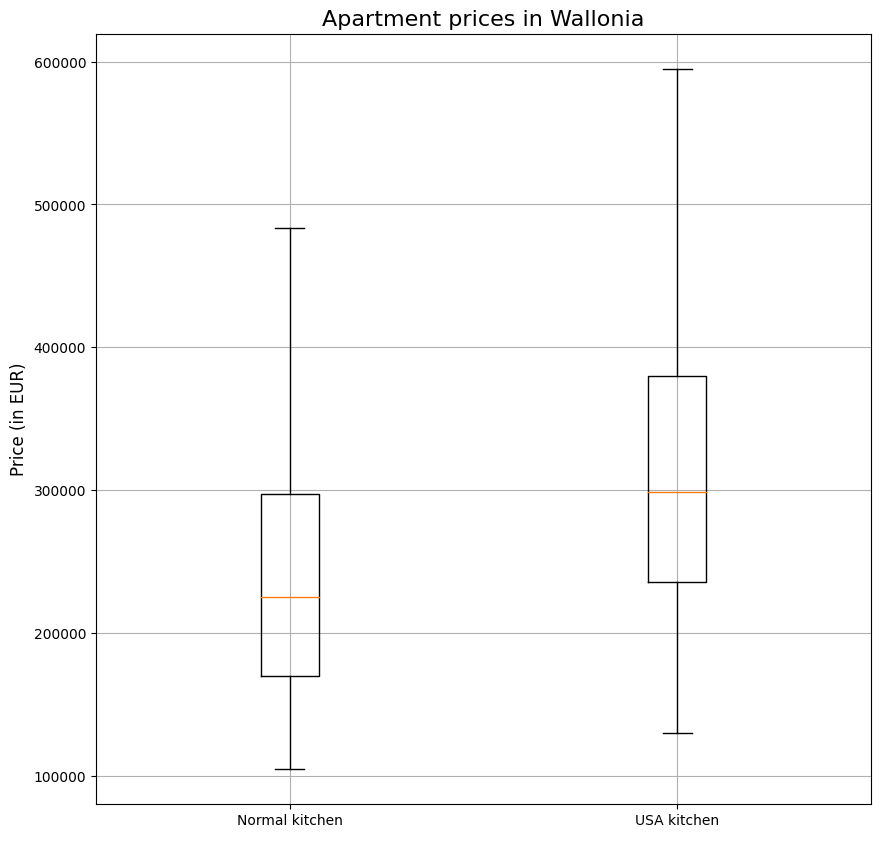

In [811]:
# mean_app= df_app.Price.mean()
# mean_usa= df_usa.Price.mean()

plt.figure(figsize=(10, 10))
plt.boxplot([df_app['Price'], df_usa['Price']],showfliers=False,labels=["Normal kitchen","USA kitchen"])
plt.xlabel(' ', fontsize=15)
plt.ylabel('Price (in EUR)', fontsize=12)
plt.title('Apartment prices in Wallonia', fontsize=16)
plt.grid(True)


It seems like there's a difference in the price according to the kitchen type. We could apply a statistical test in a next phase to see the significant difference. 

### Case 2: Analyzing the price difference between several properties in the provinces of Flanders according to their state. 

In [812]:
df_Flanders=df[df.Region=="Flanders"]

#Select apartments and houses
df_Flanders=df_Flanders[df_Flanders.Type_of_property.isin([1,3])]

#drop the columns with empty values for state of building
df_Flanders.dropna(subset=['State_of_the_building'], inplace=True)



We will use a histogram to plot the differences: 

C:\Users\nacit\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


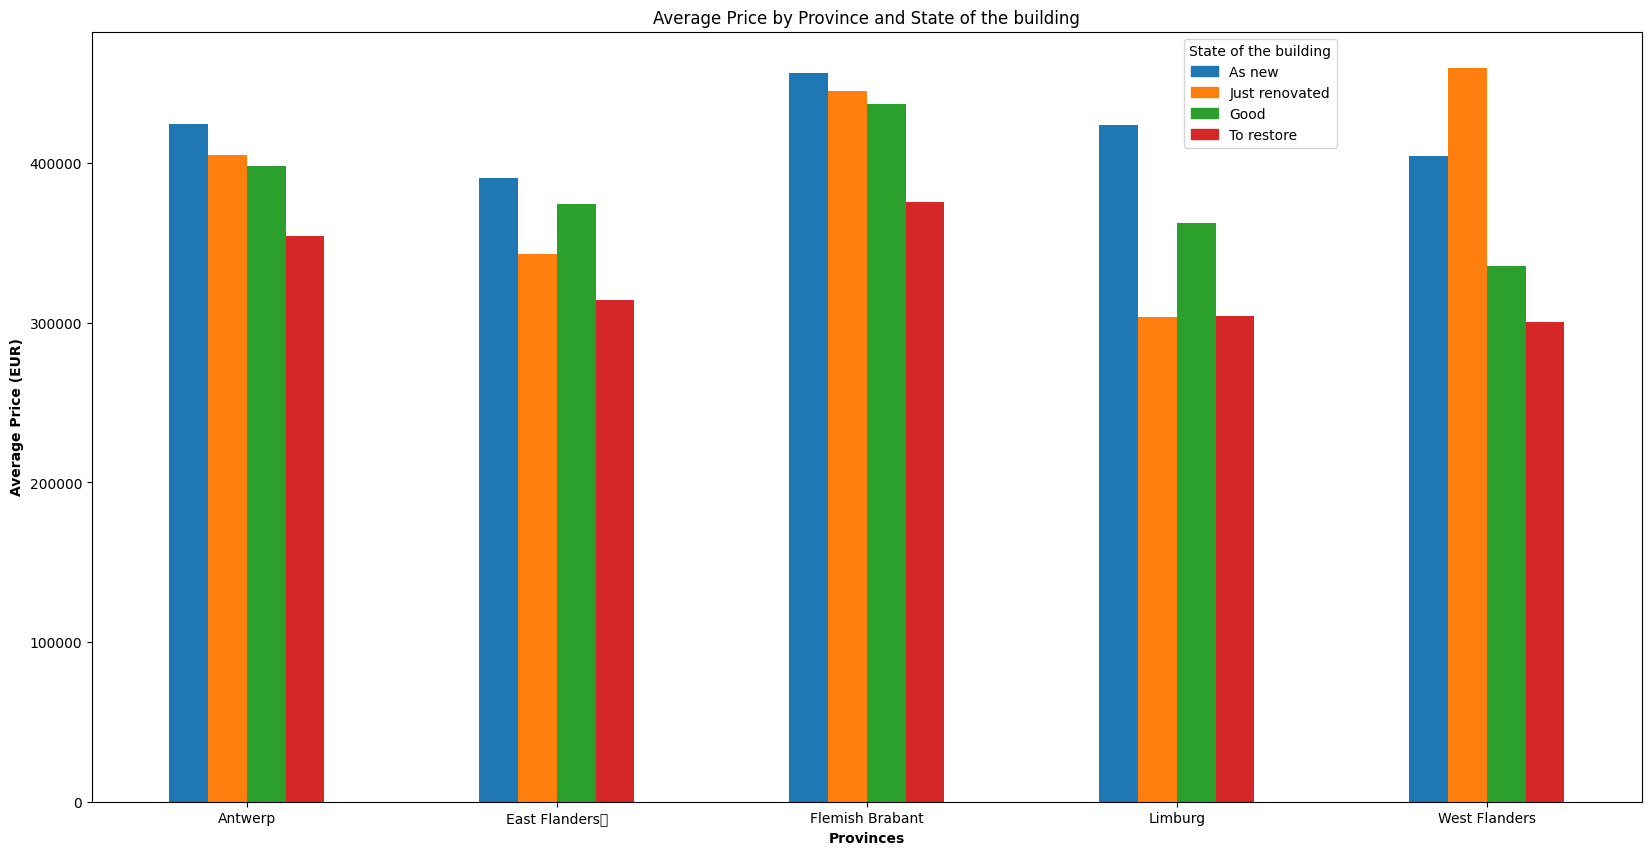

In [813]:

import matplotlib.patches as mpatches

plt.rcParams['figure.figsize'] = [20, 10]
df_Flanders_province = df_Flanders[['Price','Province','State_of_the_building']]
grouped_data = df_Flanders_province.groupby(['Province','State_of_the_building']).mean()
grouped_data = grouped_data.unstack()
grouped_data.plot(kind='bar', rot=0)
plt.xlabel('Provinces', fontdict={'weight':'bold'})
plt.ylabel('Average Price (EUR)',fontdict={'weight':'bold'})
plt.title('Average Price by Province and State of the building')
# plt.legend(title='State of the building',loc='upper left', bbox_to_anchor=(1,1))
# plt.show()

# Create custom legend
as_new = mpatches.Patch(color='tab:blue', label='As new')
just_renovated = mpatches.Patch(color='tab:orange', label='Just renovated')
good = mpatches.Patch(color='tab:green', label='Good')
to_restore = mpatches.Patch(color='tab:red', label='To restore')

# Add custom legend to the plot
plt.legend(handles=[as_new, just_renovated, good, to_restore], bbox_to_anchor=(0.70, 1), title='State of the building')

# Show plot
plt.show()

After comparing the price from new properties and properties to restore (in each province), we see that in Limburg and West Flanders there's a good profit margin. 